# Tugas 3

In [1]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('data latihan.xlsx', sheet = 'NRP 7')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Mengganti Data ? Agar Terbaca sebagai Missing Value

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         300 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        300 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    300 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [5]:
data = data.replace(' ?',np.nan)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         284 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        284 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    293 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [7]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,38.086667,193268.140000,10.213333,724.403333,103.700000,40.293333
std,13.405403,114198.739612,2.686736,3086.745571,427.589084,11.771257
min,17.000000,21174.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,116935.750000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,183545.500000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,245594.750000,13.000000,0.000000,0.000000,42.000000
max,90.000000,860348.000000,16.000000,34095.000000,2206.000000,98.000000


## Memisahkan Kolom-kolom

In [8]:
Y = ['type']
X_int = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
X_cat = ['workclass','education','marital-status','occupation','relationship','sex','native-country']

In [9]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_cat = data[X_cat]

## Melihat Jumlah Kelas

In [10]:
print(data_Y['type'].unique())

[' <=50K' ' >50K']


## Mengganti Missing Value

In [11]:
data_cat_array = []
for class_name in data_Y['type'].unique():
    data_cat_1 = data_cat[data_Y['type']==class_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [12]:
data_cat_clean = pd.concat(data_cat_array)

In [13]:
data_cat_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 293
Data columns (total 7 columns):
workclass         300 non-null object
education         300 non-null object
marital-status    300 non-null object
occupation        300 non-null object
relationship      300 non-null object
sex               300 non-null object
native-country    300 non-null object
dtypes: object(7)
memory usage: 18.8+ KB


In [14]:
data_clean = pd.concat([data_int,data_cat_clean,data_Y], axis=1)

In [15]:
data_clean.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,sex,native-country,type
0,39.0,77516.0,13.0,2174.0,0.0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,United-States,<=50K
1,50.0,83311.0,13.0,0.0,0.0,13.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,United-States,<=50K
2,38.0,215646.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,United-States,<=50K
3,53.0,234721.0,7.0,0.0,0.0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,United-States,<=50K
4,28.0,338409.0,13.0,0.0,0.0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,Cuba,<=50K


In [16]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 14 columns):
age               300 non-null float64
fnlwgt            300 non-null float64
education-num     300 non-null float64
capital-gain      300 non-null float64
capital-loss      300 non-null float64
hours-per-week    300 non-null float64
workclass         300 non-null object
education         300 non-null object
marital-status    300 non-null object
occupation        300 non-null object
relationship      300 non-null object
sex               300 non-null object
native-country    300 non-null object
type              300 non-null object
dtypes: float64(6), object(8)
memory usage: 35.2+ KB


## Standardize

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
data_clean['age'] = StandardScaler().fit(data_clean[['age']]).transform(data_clean[['age']])
data_clean['fnlwgt'] = StandardScaler().fit(data_clean[['fnlwgt']]).transform(data_clean[['fnlwgt']])
data_clean['education-num'] = StandardScaler().fit(data_clean[['education-num']]).transform(data_clean[['education-num']])
data_clean['capital-gain'] = StandardScaler().fit(data_clean[['capital-gain']]).transform(data_clean[['capital-gain']])
data_clean['capital-loss'] = StandardScaler().fit(data_clean[['capital-loss']]).transform(data_clean[['capital-loss']])
data_clean['hours-per-week'] = StandardScaler().fit(data_clean[['hours-per-week']]).transform(data_clean[['hours-per-week']])

## Deteksi Outlier

In [19]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

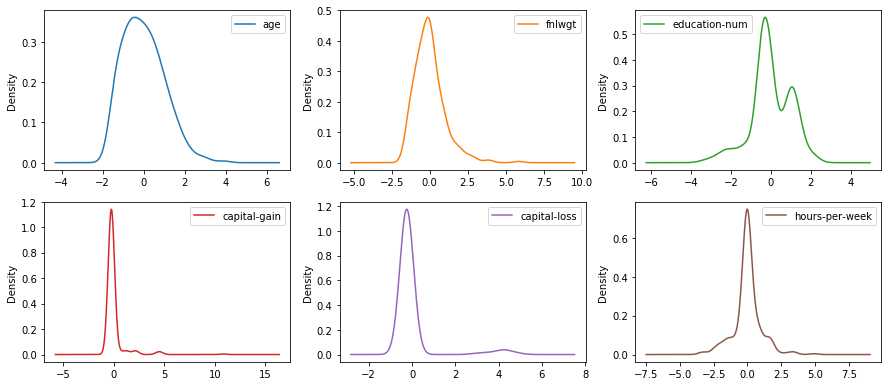

In [20]:
# Univariate Density Plots
data_clean.plot(kind='density ',subplots=True,layout=(3,3),sharex=False)
plt.show()

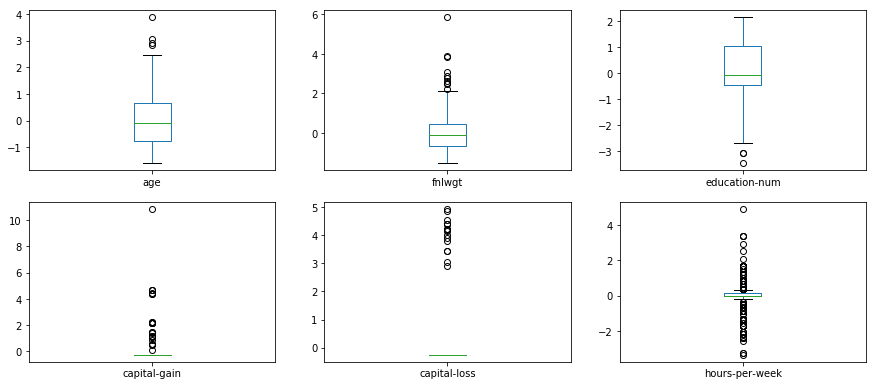

In [21]:
# Boxplot
data_clean.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

In [22]:
colors_palette = {" <=50K": "purple", " >50K": "blue"}
colors = [colors_palette[c] for c in data_clean['type']]   

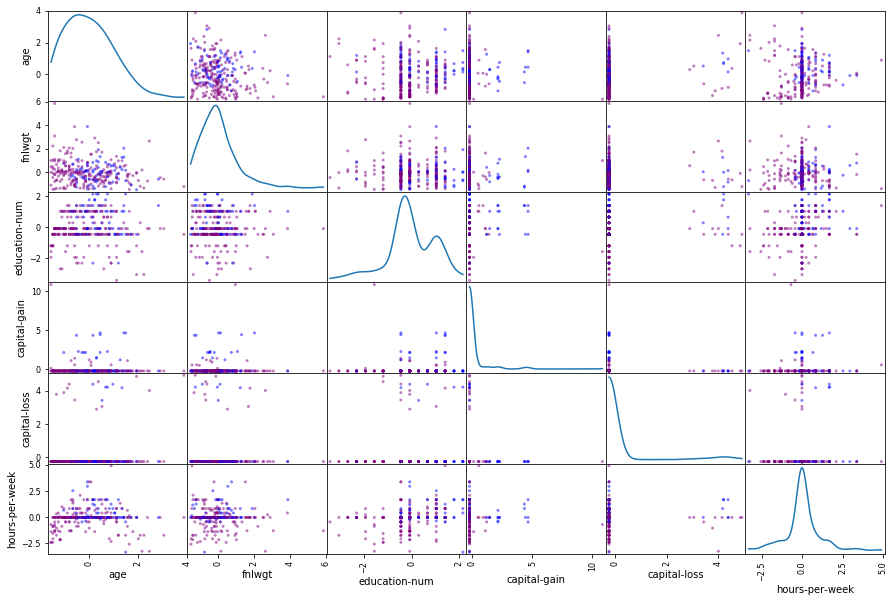

In [24]:
## red :  <=50K
## blue:  >50K
from pandas.plotting import scatter_matrix
scatter_matrix(data_clean, color=colors, diagonal='kde')
plt.show()

## Simpan Data

In [25]:
data_clean.to_csv('Oktavia Ramadhani_06211640000067.csv', index=0)